In [1]:
import context
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41
import numpy as np
from matplotlib import pyplot as plt


******************************
context imported. Front of path:
/home/patrick/repos/numeric_2022
back of path: /home/patrick/.ipython
******************************

through /home/patrick/repos/numeric_2022/notebooks/lab4/context.py


In [2]:
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41

def compare_schemes(initialVals,plot_type='values'):
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
#     y=coeff.yinitial
    ye_tmp=coeff.yinitial
    ym_tmp=coeff.yinitial
    yrk_tmp=coeff.yinitial
    ye.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    yrk.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=eulerinter41(coeff,ye_tmp,timeVec[i-1])
        ye.append(ynew)
        ye_tmp = ynew
        ynew=midpointinter41(coeff,ym_tmp,timeVec[i-1])
        ym.append(ynew)
        ym_tmp = ynew
        ynew=rk4ODEinter41(coeff,yrk_tmp,timeVec[i-1])
        yrk.append(ynew)
        yrk_tmp = ynew
#         y = ynew  # >> MISTAKE for euler & midpoint
    analytic=timeVec + np.exp(-timeVec)
    
    me = np.max(np.abs(analytic-ye))
    mm = np.max(np.abs(analytic-ym))
    mrk = np.max(np.abs(analytic-yrk))
    
    theFig=plt.figure(0)
    theFig.clf()
    theAx=theFig.add_subplot(111)
    if plot_type == 'errors':
        l2=theAx.plot(timeVec,analytic-ye,'r-',label=f'euler: max error={me:7.5f}')
        l3=theAx.plot(timeVec,analytic-ym,'g-',label=f'midpoint: max error={mm:7.5f}')
        l4=theAx.plot(timeVec,analytic-yrk,'m-',label=f'rk4: max error={mrk:7.5f}')
    else:
        l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
        l2=theAx.plot(timeVec,ye,'r-',label='euler')
        l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
        l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
    theAx.set_xlabel('time (seconds)')
    theAx.legend(loc='best')
    theAx.set_title(f'{plot_type}: dt={dt}')
    plt.grid()
    plt.show()
    
    return me, mm, mrk


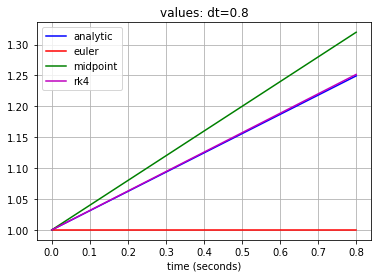

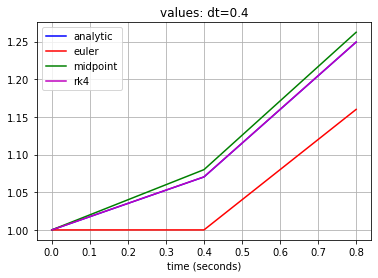

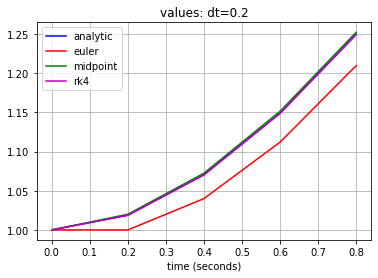

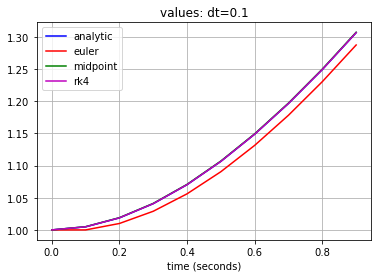

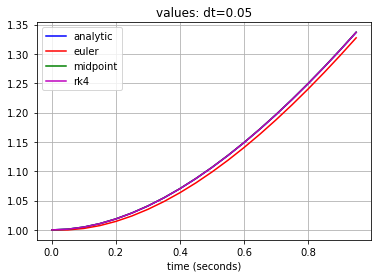

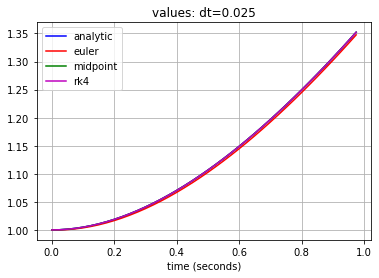

In [3]:
dts = [0.8/(2**k) for k in range(6)]
for dt in dts:
    compare_schemes({'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.})

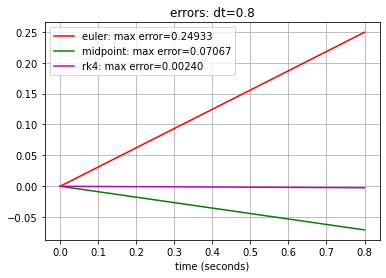

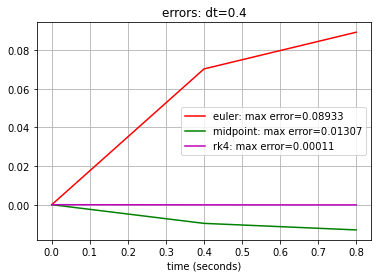

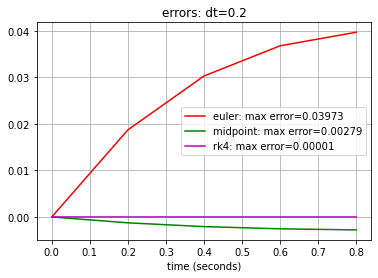

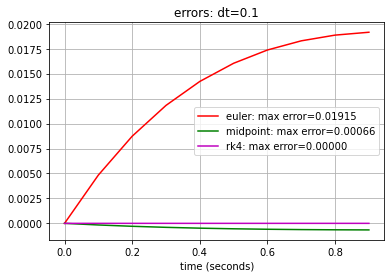

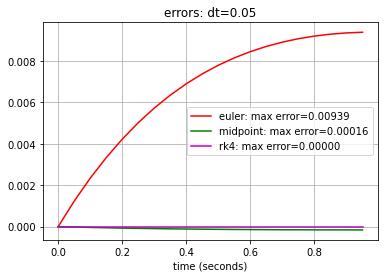

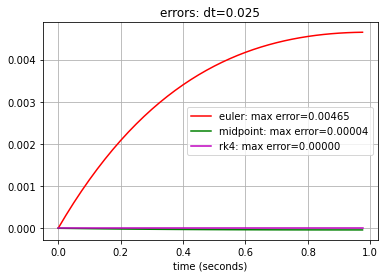

In [4]:
dts = [0.8/(2**k) for k in range(6)]
mes, mms, mrks = [],[],[]
for dt in dts:
    me, mm, mrk = compare_schemes({'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.},
                                  plot_type='errors')
    mes.append(me)
    mms.append(mm)
    mrks.append(mrk)
    

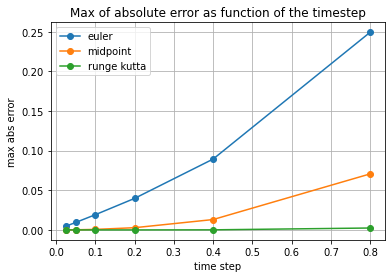

In [5]:
plt.figure()
plt.plot(dts,mes,label='euler',marker='o')
plt.plot(dts,mms,label='midpoint',marker='o')
plt.plot(dts,mrks,label='runge kutta',marker='o')
plt.xlabel('time step')
plt.ylabel('max abs error')
plt.legend()
plt.title("Max of absolute error as function of the timestep")
plt.grid()
plt.show()

In [6]:
## COMMENTS
# The Runge Kutta method appears to be by far more accurate. See maxima of absolute errors.
# Errors decrease with timestep decrease (see figure showing max of abs errors)

# ERROR in the iterations for Euler and Midpoint
# They are provided input y=ynew from the RK4 method at each time step, 
# instead of "their own ynew". Corrected here.

In [7]:
import numpy as np
from matplotlib import pyplot as plt

from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}

def compare_rks(initialVals,plot_type='values'):
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    yrkck=[]
    y1=coeff.yinitial
    y2=coeff.yinitial
    yrk.append(coeff.yinitial)
    yrkck.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
        yrk.append(ynew)
        y1=ynew 
        ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
        yrkck.append(ynew)
        y2=ynew 
    analytic=timeVec + np.exp(-timeVec)
    
    mrk = np.max(np.abs(analytic-yrk))
    mrkck = np.max(np.abs(analytic-yrkck))
    
    theFig,theAx=plt.subplots(1,1)

    if plot_type == 'errors':
        l1=theAx.plot(timeVec,analytic-yrk,'m-',label=f'rk: max error={mrk:7.5f}')
        l2=theAx.plot(timeVec,analytic-yrkck,'g-',label=f'rkck: max error={mrkck:7.5f}')
    else:
        l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
        l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
        l3=theAx.plot(timeVec,yrk,'m-',label='rk')

    theAx.set_xlabel('time (seconds)')
    theAx.legend(loc='best')
    theAx.set_title(f'{plot_type}: dt={dt}')
    plt.grid()
    plt.show()
    
    return mrk, mrkck

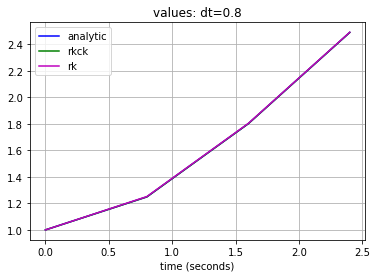

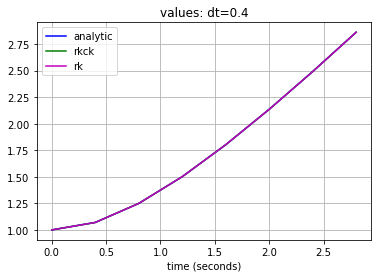

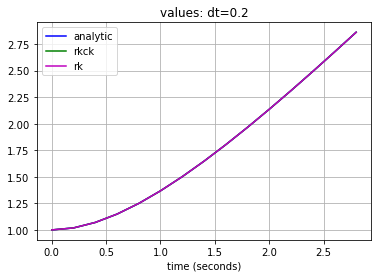

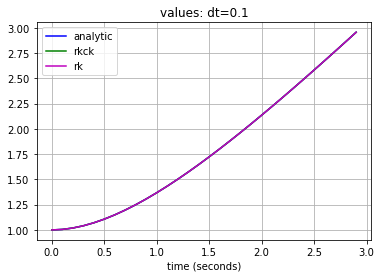

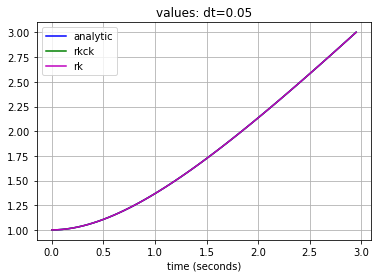

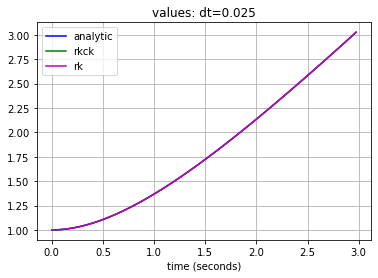

In [8]:
dts = [0.8/(2**k) for k in range(6)]
for dt in dts:
    compare_rks({'yinitial': 1,'t_beg':0.,'t_end':3.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.})

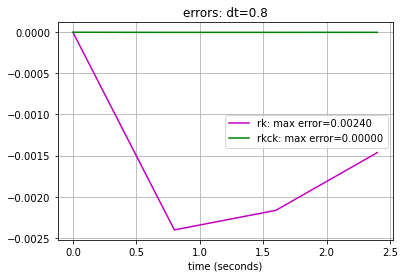

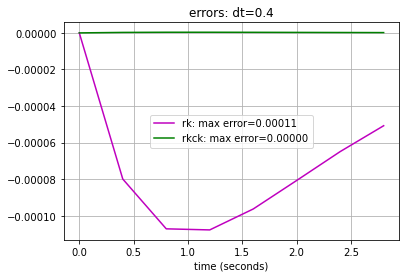

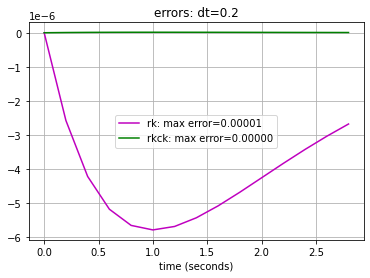

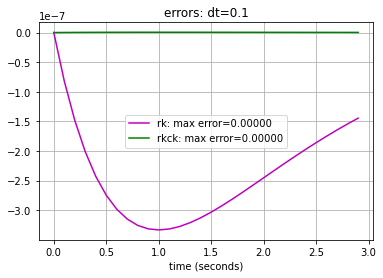

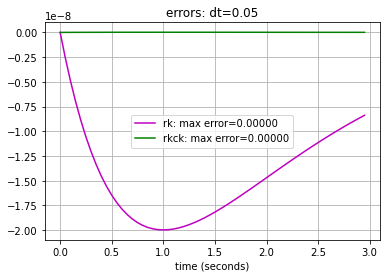

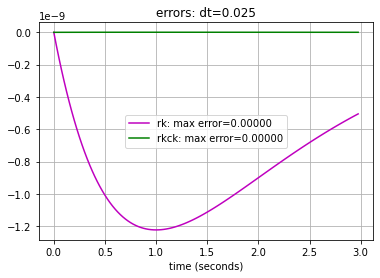

In [9]:
dts = [0.8/(2**k) for k in range(6)]
mrkcks, mrks = [],[]
for dt in dts:
    mrkck, mrk = compare_rks({'yinitial': 1,'t_beg':0.,'t_end':3.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.},
                    plot_type='errors')
    mrkcks.append(mrkck)
    mrks.append(mrk)

In [10]:
# Again here the fifth order seems to be far more accurate than the fourth order
# Error from analytical solution decreases with timesteps (see max errors)

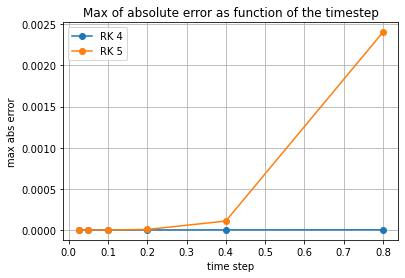

In [11]:
plt.figure()
plt.plot(dts,mrks,label='RK 4',marker='o')
plt.plot(dts,mrkcks,label='RK 5',marker='o')
plt.xlabel('time step')
plt.ylabel('max abs error')
plt.legend()
plt.title("Max of absolute error as function of the timestep")
plt.grid()
plt.show()

In [12]:
# problem coding B

In [13]:
from numlabs.lab4.lab4_functions import derivsinter41,midpointinter41

def heuninter41(coeff, y, theTime):
    k1 = coeff.dt * derivsinter41(coeff,y,theTime)
    k2 = coeff.dt * derivsinter41(coeff,y + ((2.0/3.0) * k1),theTime + (2.0/3.0)*coeff.dt)
    y = y + (1.0/4.0) * k1 + (3.0 * k2 / 4.0)
    return y

def compare_schemes_2(initialVals,plot_type='values'):
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ym=[]
    yh=[]
    ym_tmp=coeff.yinitial
    yh_tmp=coeff.yinitial
    ym.append(ym_tmp)
    yh.append(yh_tmp)
    for i in np.arange(1,nsteps):
        ynew=midpointinter41(coeff,ym_tmp,timeVec[i-1])
        ym.append(ynew)
        ym_tmp = ynew
        ynew=heuninter41(coeff,yh_tmp,timeVec[i-1])
        yh.append(ynew)
        yh_tmp = ynew
    analytic=timeVec + np.exp(-timeVec)
    
    mm = np.max(np.abs(analytic-ym))
    mh = np.max(np.abs(analytic-yh))
    
    theFig=plt.figure(0)
    theFig.clf()
    theAx=theFig.add_subplot(111)
    if plot_type == 'errors':
        l3=theAx.plot(timeVec,analytic-ym,'g-',linewidth=5,alpha=0.5,label=f'midpoint: max error={mm:7.5f}')
        l4=theAx.plot(timeVec,analytic-yh,'r-',label=f'Heun: max error={mh:7.5f}')
    else:
        l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
        l3=theAx.plot(timeVec,ym,'g-',label='midpoint',linewidth=5,alpha=0.5)
        l4=theAx.plot(timeVec,yh,'r-',label='Heun')
    theAx.set_xlabel('time (seconds)')
    theAx.legend(loc='best')
    theAx.set_title(f'{plot_type}: dt={dt}')
    plt.grid()
    plt.show()
    
    return mm, mh



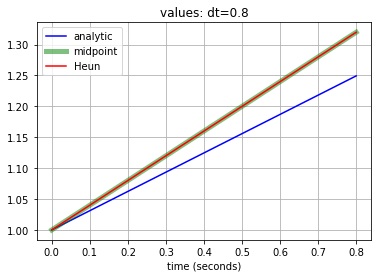

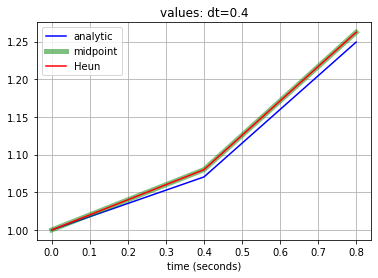

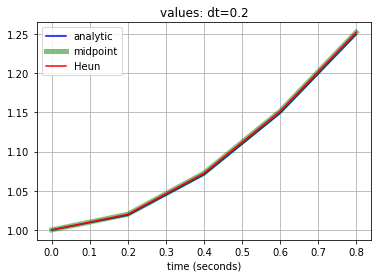

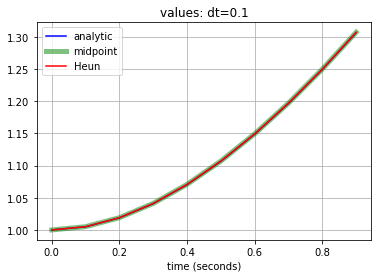

In [14]:
dts = [0.8/(2**k) for k in range(4)]
for dt in dts:
    compare_schemes_2({'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.})

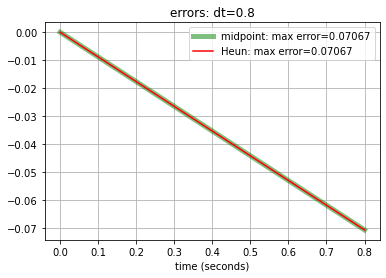

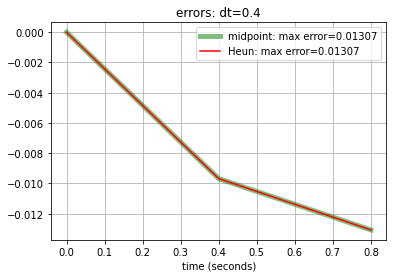

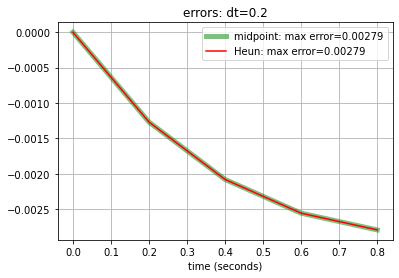

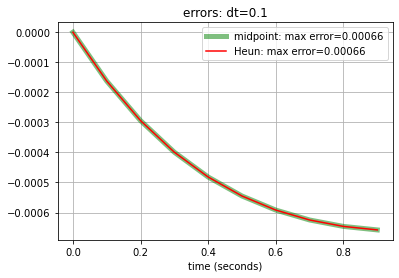

In [15]:
dts = [0.8/(2**k) for k in range(4)]
mms, mhs = [],[]
for dt in dts:
    mm, mh = compare_schemes_2({'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.},
                    plot_type='errors')
    mms.append(mm)
    mhs.append(mh)

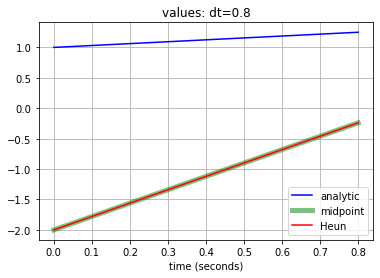

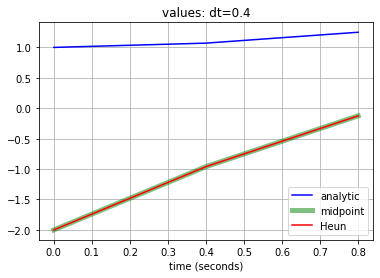

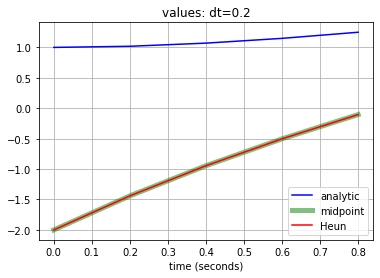

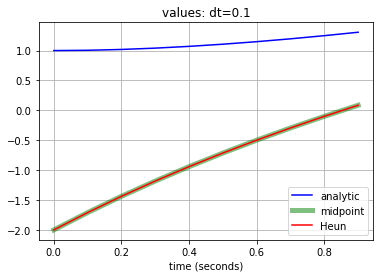

In [16]:
dts = [0.8/(2**k) for k in range(4)]
mms, mhs = [],[]
for dt in dts:
    mm, mh = compare_schemes_2({'yinitial': -2,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.},
                    plot_type='values')
    mms.append(mm)
    mhs.append(mh)

In [17]:
# These two methods seem to lead to scrictly identical numerical solutions
# Our differential equation f(y,t) = -y+t+1 is bilinear (+ constant 1).
# In such a context, algebraic derivations through midpoint or Heun's methods lead to the same expression:
# Midpoint ==> k2 = h*f(yn+k1/2,tn+h/2) = k1 - h*k1/2 + h*h/2
# Heun ==> k2 = h*f(yn+k1*2/3,tn+h*2/3) = k1 - h*k1*2/3 + h*h*2/3 
# So Heun ==> k1/4 + 3*k2/4 = Midpoint derivation = k1 - h*k1/2 + h*h/2

In [18]:
# Problem C: dT/dt = -l*(T-Ta), T(0) = T0

# IMPORT
from numlabs.lab4.lab4_functions import derivsinter41,midpointinter41,initinter41

def newtonian_cooling(initialVals):
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ym=[]
    ym_tmp=coeff.yinitial
    ym.append(ym_tmp)
    for i in np.arange(1,nsteps):
        ynew=midpointinter41(coeff,ym_tmp,timeVec[i-1])
        ym.append(ynew)
        ym_tmp = ynew

    analytic = Ta + (T0 - Ta)*np.exp(-l*timeVec)

    mm = np.max(np.abs(analytic-ym))

    theFig=plt.figure(0)
    theFig.clf()
    theAx=theFig.add_subplot(111)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
    l4=theAx.axhline(y=T0, color='r', linestyle='-',label=f'T0={T0}°C')
    l5=theAx.axhline(y=Ta, color='r', linestyle='-',label=f'Ta={Ta}°C')    
    theAx.set_xlabel('time (seconds)')
    theAx.set_ylabel('Temperature (°C)')
    theAx.legend(loc='best')
    theAx.set_title(f'Numerical solution of the Newtonian cooling equation'+
                   f'\nlambda={l}/s')
    theAx.set_xlim([0,None])
    plt.grid()
    plt.show()


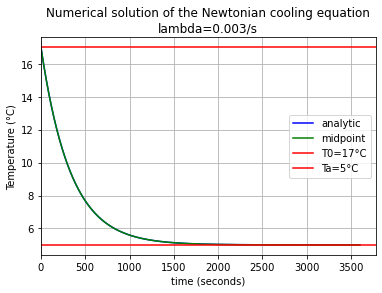

In [19]:
# Physical variables:
l = 0.003
Ta = 5
T0 = 17

# Numerical variables
c1 = -l
c2 = 0
c3 = l*Ta

initialVals={'yinitial': T0,'t_beg':0.,'t_end':3600.,'dt':0.2,'c1':c1,'c2':c2,'c3':c3}
newtonian_cooling(initialVals)


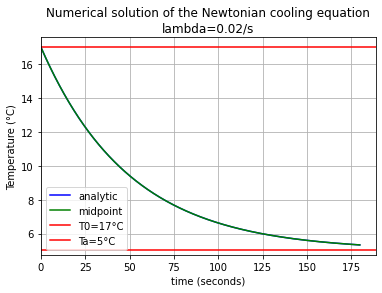

In [20]:
# Physical variables:
l = 0.02
Ta = 5
T0 = 17

# Numerical variables
c1 = -l
c2 = 0
c3 = l*Ta

initialVals={'yinitial': T0,'t_beg':0.,'t_end':180.,'dt':0.2,'c1':c1,'c2':c2,'c3':c3}
newtonian_cooling(initialVals)


In [21]:
# This shows the numerical solution of one of the simplest physical models: 
# 1st order linear ODE, appearing in Newtonian cooling as well as
# radioactivity desintegration, atmospheric pressure etc.
# The midpoint numerical scheme works wonders.